In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

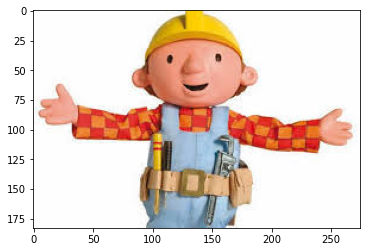

In [45]:
img= cv2.imread("bob.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [116]:
img= cv2.imread("images/1-Saint-Basils-Cathedral.jpg")

In [117]:
img.shape

(600, 394, 3)

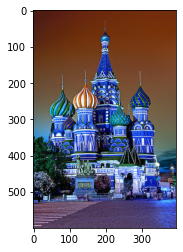

In [118]:
plt.imshow(img)
plt.show()

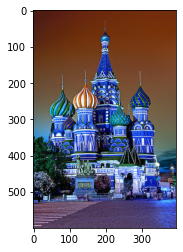

In [119]:
plt.imshow(img)
plt.show()

In [120]:
img.shape

(600, 394, 3)

In [121]:
all_pixels=img.reshape((-1,3))

In [122]:
all_pixels.shape

(236400, 3)

In [123]:
all_pixels.shape

(236400, 3)

In [124]:
from sklearn.cluster import KMeans

In [125]:
k=9
km=KMeans(n_clusters=k)

In [126]:
km.fit(all_pixels)

KMeans(n_clusters=9)

In [127]:
km.cluster_centers_

array([[115.82246738,  83.86782094,  54.79103144],
       [138.75605228, 165.30989158, 210.49747512],
       [ 13.14969219,  23.6366942 ,  28.37679819],
       [102.93516282, 110.39095565, 130.07213257],
       [216.16169695, 231.72650613, 241.11397027],
       [ 64.47981131,  63.69113281,  96.69090189],
       [109.20057283,  50.22756565,  18.09891263],
       [ 17.63288173,  39.21098499, 166.40768949],
       [ 50.34664527, 105.13202889, 225.14746003]])

In [128]:
centers=np.array(km.cluster_centers_,dtype="uint")
#uint8 to represent number btw 0-255 8 bit integer is sufficient 

In [129]:
centers 

array([[115,  83,  54],
       [138, 165, 210],
       [ 13,  23,  28],
       [102, 110, 130],
       [216, 231, 241],
       [ 64,  63,  96],
       [109,  50,  18],
       [ 17,  39, 166],
       [ 50, 105, 225]], dtype=uint32)

### plot all these color ( data centres)

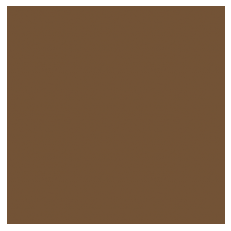

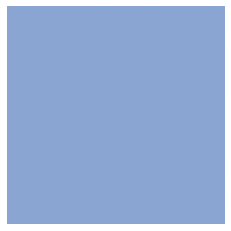

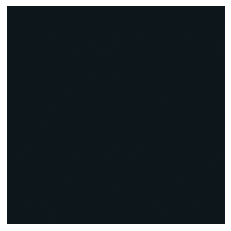

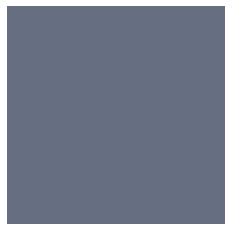

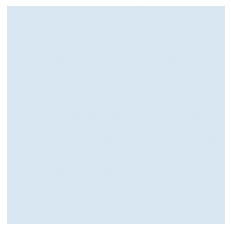

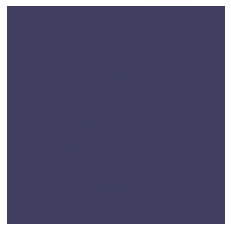

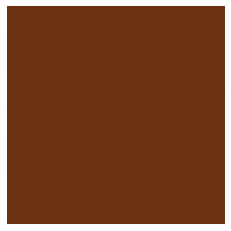

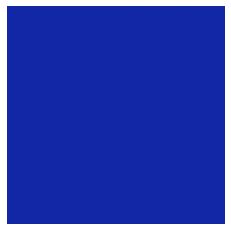

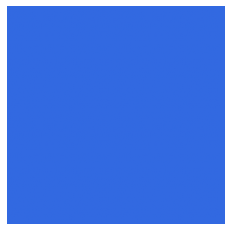

In [130]:
for c in centers:
    a=np.zeros((100,100,3))
    a[:,:,:]=c
    
    plt.imshow(a/255)
    plt.axis("off")
    plt.show()

In [131]:
km.labels_

array([6, 6, 6, ..., 8, 5, 5])

In [132]:
new_img = np.zeros((all_pixels.shape[0], 3), dtype="uint")


In [133]:
new_img.shape


(236400, 3)

In [134]:
# giving appropriate colors to the pixel/data points of new image
for ix in range(all_pixels.shape[0]): #pic colors from centre and map it according to labels
    new_img[ix] = centers[km.labels_[ix]]

or we can do it like this by using plt.figure and creating list of all colors

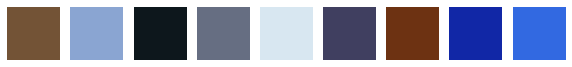

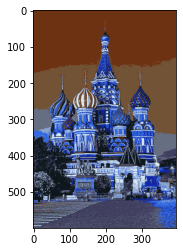

In [135]:
i= 1

plt.figure(0,figsize=(10,2)) #fig size


colors = []

for each_col in centers:
    plt.subplot(1,len(centers),i) # 1 row 9 col
    plt.axis("off")
    i+=1 #everytime we go to next box we increment it!
    
    colors.append(each_col)
    
    #Color Swatch
    a = np.zeros((100,100,3),dtype='uint')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()


for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((img.shape))
plt.imshow(new_img)
plt.show()

In [136]:
new_img


array([[[109,  50,  18],
        [109,  50,  18],
        [109,  50,  18],
        ...,
        [109,  50,  18],
        [109,  50,  18],
        [109,  50,  18]],

       [[109,  50,  18],
        [109,  50,  18],
        [109,  50,  18],
        ...,
        [109,  50,  18],
        [109,  50,  18],
        [109,  50,  18]],

       [[109,  50,  18],
        [109,  50,  18],
        [109,  50,  18],
        ...,
        [109,  50,  18],
        [109,  50,  18],
        [109,  50,  18]],

       ...,

       [[ 64,  63,  96],
        [ 64,  63,  96],
        [115,  83,  54],
        ...,
        [ 50, 105, 225],
        [ 50, 105, 225],
        [ 50, 105, 225]],

       [[ 64,  63,  96],
        [ 64,  63,  96],
        [102, 110, 130],
        ...,
        [ 64,  63,  96],
        [102, 110, 130],
        [102, 110, 130]],

       [[ 64,  63,  96],
        [ 64,  63,  96],
        [102, 110, 130],
        ...,
        [ 50, 105, 225],
        [ 64,  63,  96],
        [ 64,  63,  96]]

In [137]:
new_img.shape


(600, 394, 3)

In [138]:
new_img = new_img.reshape((600,394,3))


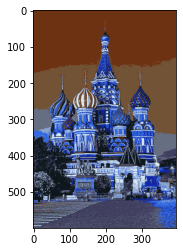

In [139]:
plt.imshow(new_img)
plt.show()

In [140]:
def plot_colors(hist, centroids):
        # initialize the bar chart representing the relative frequency
        # of each of the colors
        bar = np.zeros((50, 300, 3), dtype = "uint8")
        startX = 0
        # loop over the percentage of each cluster and the color of
        # each cluster
        for (percent, color) in zip(hist, centroids):
            #The zip() function returns an 
            #iterator of tuples based on the iterable objects
            # plot the relative percentage of each cluster
            #zip() returns an iterator of 
            #tuples with each tuple having only one element.
            endX = startX + (percent * 300)
            cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                color.astype("uint8").tolist(), -1)
            startX = endX

        # return the bar chart
        return bar

In [141]:
numLabels = np.arange(0, len(np.unique(km.labels_)) + 1)

(hist, _) = np.histogram(km.labels_, bins = numLabels)
# normalize the histogram, such that it sums to one
hist = hist.astype("float")
hist /= hist.sum()
       

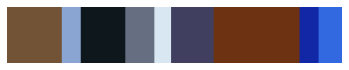

In [142]:
bar = plot_colors(hist, km.cluster_centers_)
# show our color bart
plt.imshow(img)
plt.axis("off")
plt.imshow(bar)
plt.show()